In [47]:
# import libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
import pandas as pd
import yfinance as yf
import warnings

In [48]:
# Database
start = "2005-01-01"
end   = "2025-12-31"

us_tech = ['AAPL','MSFT','GOOGL','AMZN','META','NVDA','AVGO','TSLA','ORCL','INTC']
eu_energy = ['SHEL.L','BP.L','TTE.PA','ENI.MI','EQNR.OL','REP.MC','PKN.WA','OMV.VI','RWE.DE','ENGI.PA']

tickers = us_tech + eu_energy
sectors = (["US Tech"]*len(us_tech)) + (["EU Energy"]*len(eu_energy))

def get_data(tickers, start, end):
    raw = yf.download(tickers, start=start, end=end, auto_adjust=False, progress=False)['Close']
    raw = raw.dropna()
    return raw


data = get_data(tickers, start, end)
print(data.shape)
display(data.head())

(3149, 20)


Ticker      AAPL  AMZN  AVGO   BP.L  ENGI.PA  ENI.MI  EQNR.OL  GOOGL  INTC  \
Date                                                                         
2012-05-18 18.94 10.69  3.00 391.95    16.24   15.93   138.30  15.03 26.07   
2012-05-21 20.05 10.91  3.09 395.60    16.20   15.37   139.10  15.37 26.15   
2012-05-22 19.89 10.77  3.13 401.95    16.48   15.90   140.00  15.04 26.03   
2012-05-23 20.38 10.86  3.35 393.90    16.07   15.34   136.50  15.25 25.44   
2012-05-24 20.19 10.76  3.25 407.00    16.43   15.72   138.90  15.11 25.65   

Ticker      META  MSFT  NVDA  OMV.VI  ORCL  PKN.WA  REP.MC  RWE.DE  SHEL.L  \
Date                                                                         
2012-05-18 38.23 29.27  0.30   22.10 25.61   33.70   13.68   29.99 1982.00   
2012-05-21 34.03 29.75  0.31   22.75 26.26   34.19   13.49   29.73 1983.50   
2012-05-22 31.00 29.76  0.30   23.05 26.36   34.51   13.77   30.50 2020.00   
2012-05-23 32.00 29.11  0.31   22.50 26.68   33.65   13.35   29.34 1970.50   
2012-05-24 33.03 29.07  0.30   22.72 26.12   33.85   13.80   29.99 2013.00   

Ticker      TSLA  TTE.PA  
Date                      
2012-05-18  1.84   34.65  
2012-05-21  1.92   34.58  
2012-05-22  2.05   35.15  
2012-05-23  2.07   34.49  
2012-05-24  2.02   35.00

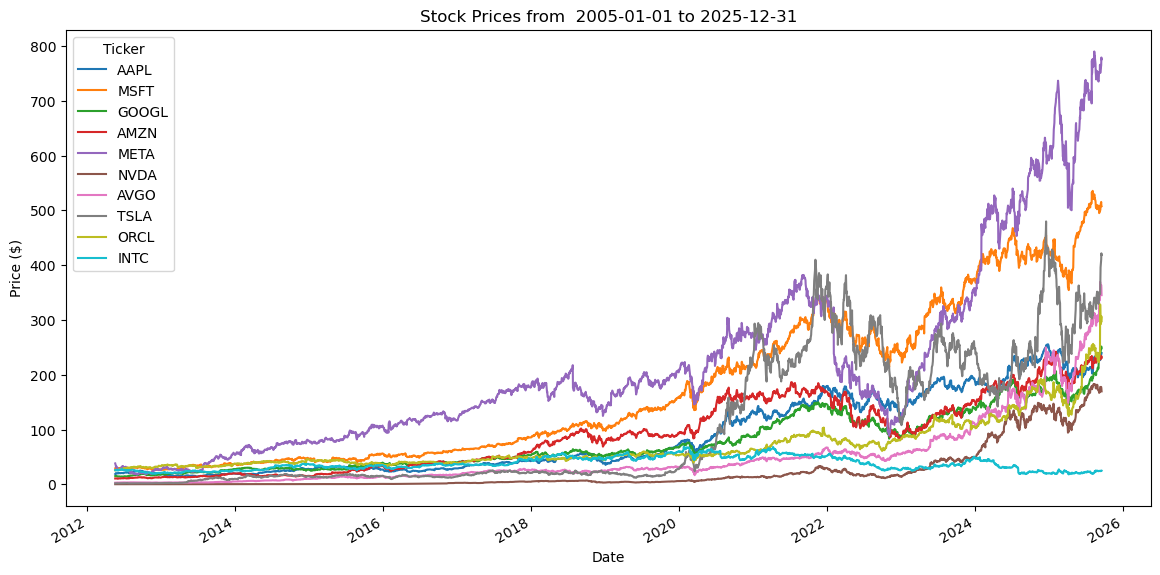

In [49]:
data[us_tech].plot(figsize=(14,7)
          , title="Stock Prices from  {start} to {end}".format(start=start, end=end)
		 , ylabel="Price ($)"
		 , xlabel="Date"
		 )

plt.show()

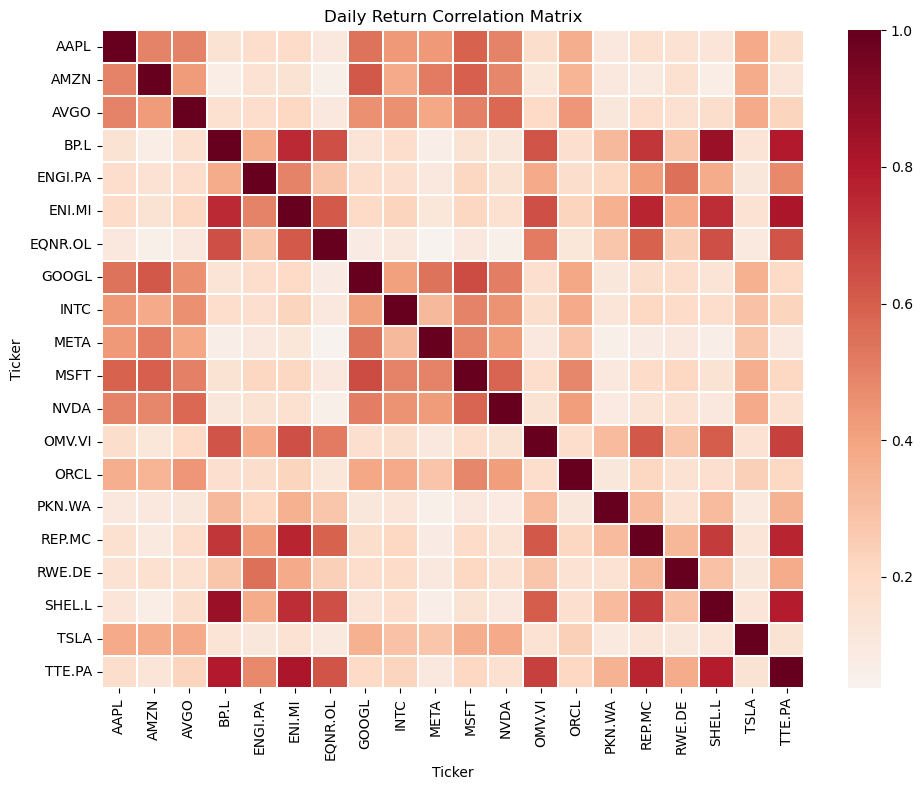

In [50]:
# Daily returns and correlation

rets = data.pct_change().dropna()
corr = rets.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="RdBu_r", center=0, annot=False, linewidths=0.2)
plt.title("Daily Return Correlation Matrix")
plt.tight_layout()
plt.show()

In [51]:
# Top-level summary by ticker
summary = pd.DataFrame({
    'start_price': data.iloc[0],
    'end_price': data.iloc[-1],
    'total_return_%': ((data.iloc[-1] / data.iloc[0]) - 1) * 100,
    'annualized_vol_%': rets.std() * np.sqrt(252) * 100,
    'annualized_return_%': rets.mean() * 252 * 100,
})
pd.set_option('display.float_format', '{:.2f}'.format)
display(summary.round(2))

start_price  end_price  total_return_%  annualized_vol_%  \
Ticker                                                              
AAPL           18.94     239.63         1165.06             29.46   
AMZN           10.69     231.02         2060.55             33.12   
AVGO            3.00     345.39        11405.33             38.64   
BP.L          391.95     419.05            6.91             29.66   
ENGI.PA        16.24      17.88           10.07             25.11   
ENI.MI         15.93      14.86           -6.72             27.59   
EQNR.OL       138.30     242.20           75.13             29.61   
GOOGL          15.03     248.24         1552.21             28.50   
INTC           26.07      25.06           -3.89             36.47   
META           38.23     775.82         1929.35             41.16   
MSFT           29.27     507.62         1634.27             26.90   
NVDA            0.30     169.74        56105.30             46.12   
OMV.VI         22.10      45.68          106.65             32.95   
ORCL           25.61     297.66         1062.28             30.72   
PKN.WA         33.70      82.22          143.98             33.41   
REP.MC         13.68      14.74            7.75             32.52   
RWE.DE         29.99      35.76           19.24             32.37   
SHEL.L       1982.00    2606.00           31.48             27.92   
TSLA            1.84     418.73        22690.13             59.76   
TTE.PA         34.65      51.73           49.29             27.08   

         annualized_return_%  
Ticker                        
AAPL                   24.66  
AMZN                   30.08  
AVGO                   45.44  
BP.L                    4.94  
ENGI.PA                 3.96  
ENI.MI                  3.30  
EQNR.OL                 8.88  
GOOGL                  26.51  
INTC                    6.39  
META                   32.59  
MSFT                   26.46  
NVDA                   61.29  
OMV.VI                 11.27  
ORCL                   24.24  
PKN.WA                 12.72  
REP.MC                  5.87  
RWE.DE                  6.67  
SHEL.L                  6.10  
TSLA                   61.09  
TTE.PA                  6.89

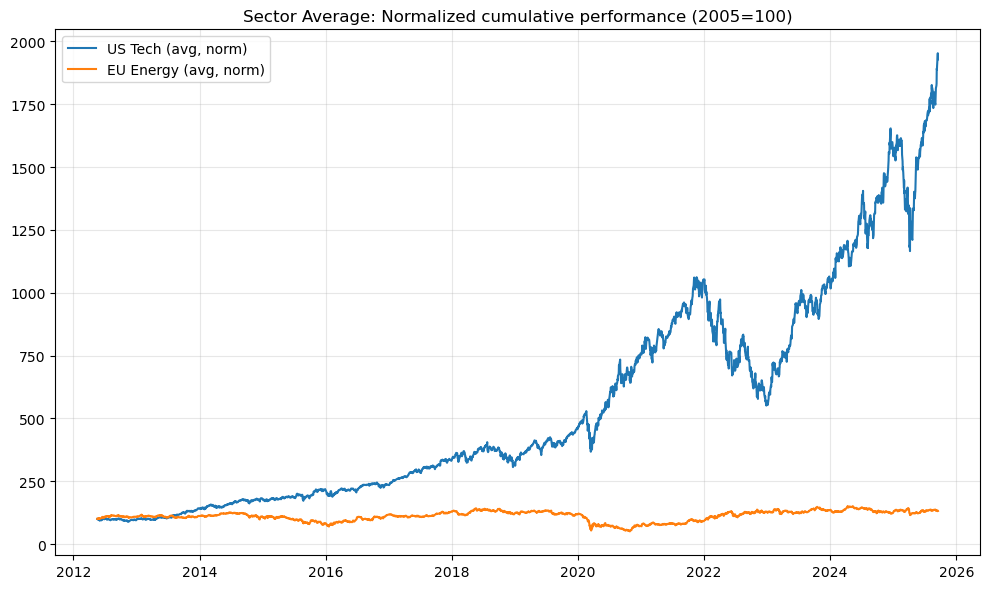

In [52]:
# Compare sector cumulative returns

df_sector = pd.DataFrame(index=data.index)
df_sector['US_Tech'] = data[us_tech].mean(axis=1) / data[us_tech].iloc[0].mean() * 100
df_sector['EU_Energy'] = data[eu_energy].mean(axis=1) / data[eu_energy].iloc[0].mean() * 100

plt.figure(figsize=(10,6))
plt.plot(df_sector.index, df_sector['US_Tech'], label='US Tech (avg, norm)')
plt.plot(df_sector.index, df_sector['EU_Energy'], label='EU Energy (avg, norm)')
plt.title('Sector Average: Normalized cumulative performance (2005=100)')
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
plt.show()

In [53]:
# Pairwise highest/lowest correlations

flat = corr.unstack().dropna()
flat = flat[flat.index.get_level_values(0) != flat.index.get_level_values(1)]
flat = flat.sort_values()
print("\nMost negatively correlated pair:\n", flat.head(1))
print("\nMost positively correlated pair:\n", flat.tail(1))


Most negatively correlated pair:
 Ticker  Ticker 
META    EQNR.OL   0.04
dtype: float64

Most positively correlated pair:
 Ticker  Ticker
SHEL.L  BP.L     0.86
dtype: float64


In [54]:
# Configurable Strategy Parameters
initial_cash = 200_000.0
max_positions = 5                # max concurrent positions
position_fraction = 0.18         # fraction of current portfolio to allocate per new position
rsi_period = 14
bb_period = 20
bb_k = 2
rsi_entry = 30
rsi_exit = 50
holding_limit_days = 60          # force exit after X days (safety)
commission_per_trade = 1.0       # flat commission per trade
slippage_pct = 0.001             # 0.1% slippage on entry/exit (approx)

In [55]:
# RSI and Bollinger Bands

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    # Wilder's EMA smoothing
    avg_gain = gain.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False, min_periods=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_bbands(series, period=20, k=2):
    sma = series.rolling(window=period).mean()
    std = series.rolling(window=period).std()
    upper = sma + k * std
    lower = sma - k * std
    return sma, upper, lower

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    raw = yf.download(
        tickers,
        start=start,
        end=end,
        progress=False,
        auto_adjust=True      # explicit setting – avoids the warning altogether
    )['Close']

raw = raw.dropna()
available_tickers = list(raw.columns)
print("Tickers available:", available_tickers)

data = {}
for t in available_tickers:
    df = pd.DataFrame(index=raw.index)
    df['Close'] = raw[t]
    df['RSI'] = compute_rsi(df['Close'], period=rsi_period)
    df['SMA20'], df['BB_up'], df['BB_low'] = compute_bbands(df['Close'],
                                                           period=bb_period,
                                                           k=bb_k)

    # Signals:
    # RSI bounce: RSI crosses from below rsi_entry to above
    df['rsi_signal'] = ((df['RSI'] > rsi_entry) &
                        (df['RSI'].shift(1) < rsi_entry)).astype(int)

    # Bollinger bounce: close crosses above lower band after being below it
    df['bb_signal'] = ((df['Close'] > df['BB_low']) &
                       (df['Close'].shift(1) < df['BB_low'].shift(1))).astype(int)

    # Combine: buy if either signal occurs (customize if you want both)
    df['buy_signal'] = ((df['rsi_signal'] == 1) |
                        (df['bb_signal'] == 1)).astype(int)

    # Exit signals: RSI > rsi_exit OR price > SMA20
    df['exit_signal'] = ((df['RSI'] > rsi_exit) |
                         (df['Close'] > df['SMA20'])).astype(int)

    data[t] = df


Tickers available: ['AAPL', 'AMZN', 'AVGO', 'BP.L', 'ENGI.PA', 'ENI.MI', 'EQNR.OL', 'GOOGL', 'INTC', 'META', 'MSFT', 'NVDA', 'OMV.VI', 'ORCL', 'PKN.WA', 'REP.MC', 'RWE.DE', 'SHEL.L', 'TSLA', 'TTE.PA']


In [57]:
# Strategy backtest loop

dates = raw.index
cash = initial_cash
positions = {t: 0 for t in available_tickers}      # units held
position_entry_price = {t: None for t in available_tickers}
position_entry_date  = {t: None for t in available_tickers}
portfolio_values = []
trade_log = []  # list of dicts with trade info

for date in dates:
    # 1) compute current portfolio value
    pv_positions = sum(positions[t] * data[t].loc[date, 'Close'] for t in available_tickers)
    total_value = cash + pv_positions
    portfolio_values.append({'date': date, 'total': total_value, 'cash': cash, 'positions_value': pv_positions})
    
    # 2) check exits first
    for t in available_tickers:
        if positions[t] > 0:
            # if exit signal or holding limit hit
            if (data[t].loc[date, 'exit_signal'] == 1) or ((date - position_entry_date[t]).days >= holding_limit_days):
                exit_price = data[t].loc[date, 'Close'] * (1 - slippage_pct)  # slippage on exit (sell a bit lower)
                qty = positions[t]
                proceeds = qty * exit_price - commission_per_trade
                cash += proceeds
                pnl = (exit_price - position_entry_price[t]) * qty - commission_per_trade
                trade_log.append({
                    'ticker': t, 'entry_date': position_entry_date[t], 'exit_date': date,
                    'entry_price': position_entry_price[t], 'exit_price': exit_price,
                    'qty': qty, 'pnl': pnl
                })
                positions[t] = 0
                position_entry_price[t] = None
                position_entry_date[t] = None

    # 3) entries
    open_count = sum(1 for v in positions.values() if v > 0)
    for t in available_tickers:
        if positions[t] == 0 and open_count < max_positions:
            if data[t].loc[date, 'buy_signal'] == 1:
                # compute allocation based on current total_value or available cash
                alloc = min(position_fraction * total_value, cash)
                if alloc <= 0:
                    continue
                entry_price = data[t].loc[date, 'Close'] * (1 + slippage_pct)  # buy a bit higher
                qty = math.floor((alloc - commission_per_trade) / entry_price)
                if qty <= 0:
                    continue
                cost = qty * entry_price + commission_per_trade
                cash -= cost
                positions[t] = qty
                position_entry_price[t] = entry_price
                position_entry_date[t] = date
                open_count += 1

# finalize portfolio values to series
pv_df = pd.DataFrame(portfolio_values).set_index('date')
pv_df['total'] = pv_df['total']
pv_series = pv_df['total']

In [58]:
# Performance metrics

def compute_metrics(equity_series):
    returns = equity_series.pct_change().dropna()
    total_return = equity_series.iloc[-1] / equity_series.iloc[0] - 1
    ann_return = (1 + total_return) ** (252.0 / len(returns)) - 1 if len(returns)>0 else np.nan
    ann_vol = returns.std() * np.sqrt(252)
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else np.nan
    cummax = equity_series.cummax()
    drawdown = (equity_series - cummax) / cummax
    max_drawdown = drawdown.min()
    return {
        'total_return': total_return,
        'ann_return': ann_return,
        'ann_vol': ann_vol,
        'sharpe': sharpe,
        'max_drawdown': max_drawdown
    }

metrics = compute_metrics(pv_series)
print("\nPortfolio performance:")
for k,v in metrics.items():
    if isinstance(v, float):
        print(f"  {k}: {v:.4f}")
    else:
        print(f"  {k}: {v}")

# Trades summary
trades = pd.DataFrame(trade_log)
if not trades.empty:
    wins = trades[trades['pnl'] > 0]
    losses = trades[trades['pnl'] <= 0]
    win_rate = len(wins) / len(trades)
    avg_win = wins['pnl'].mean() if len(wins)>0 else np.nan
    avg_loss = losses['pnl'].mean() if len(losses)>0 else np.nan
    print("\nTrades summary:")
    print(f"  # trades: {len(trades)}, wins: {len(wins)}, losses: {len(losses)}, win_rate: {win_rate:.2%}")
    print(f"  avg_win: {avg_win:.2f}, avg_loss: {avg_loss:.2f}")
else:
    print("\nNo trades were executed with current settings.")

# Slice last 3 years of portfolio value
end_date = pv_series.index[-1]
start_date = end_date - pd.DateOffset(years=3)
pv_slice = pv_series.loc[start_date:end_date]

# Compute cumulative profit
profit_slice = pv_slice - pv_slice.iloc[0]



Portfolio performance:
  total_return: 1.5502
  ann_return: 0.0778
  ann_vol: 0.1642
  sharpe: 0.5390
  max_drawdown: -0.4958

Trades summary:
  # trades: 746, wins: 546, losses: 200, win_rate: 73.19%
  avg_win: 1690.27, avg_loss: -3045.42


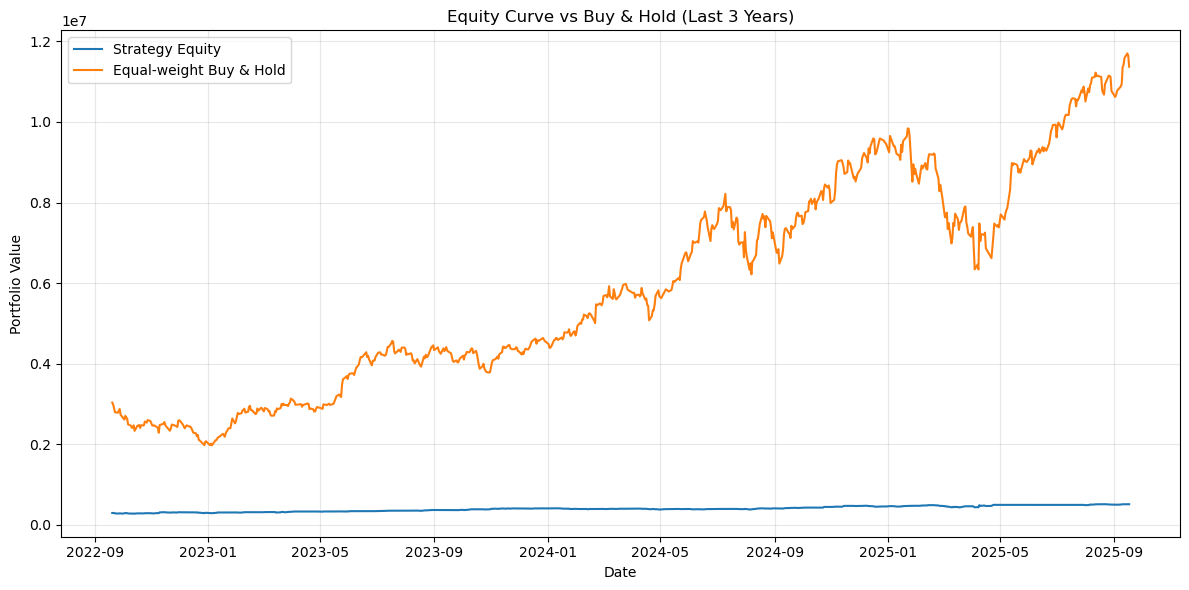

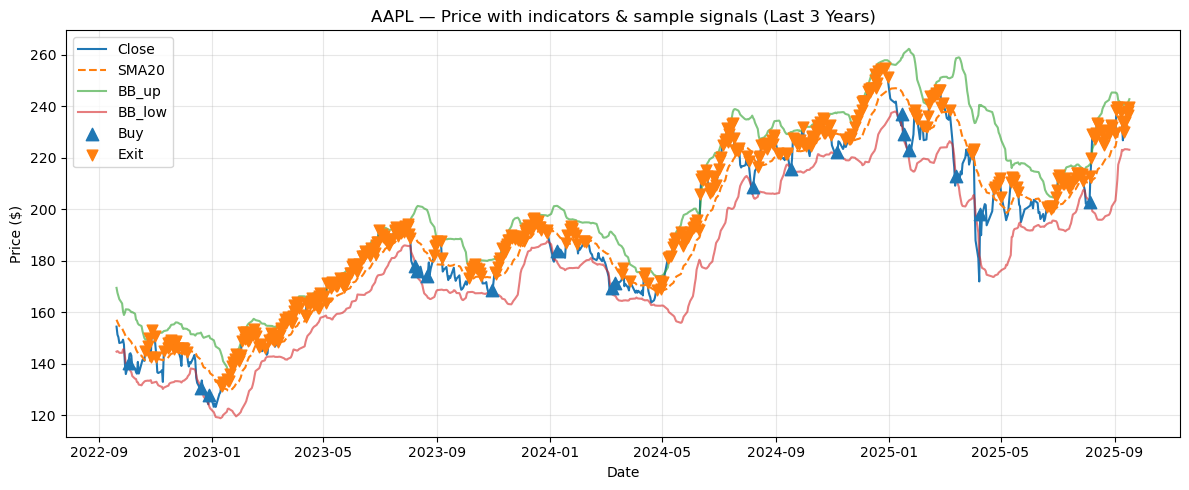

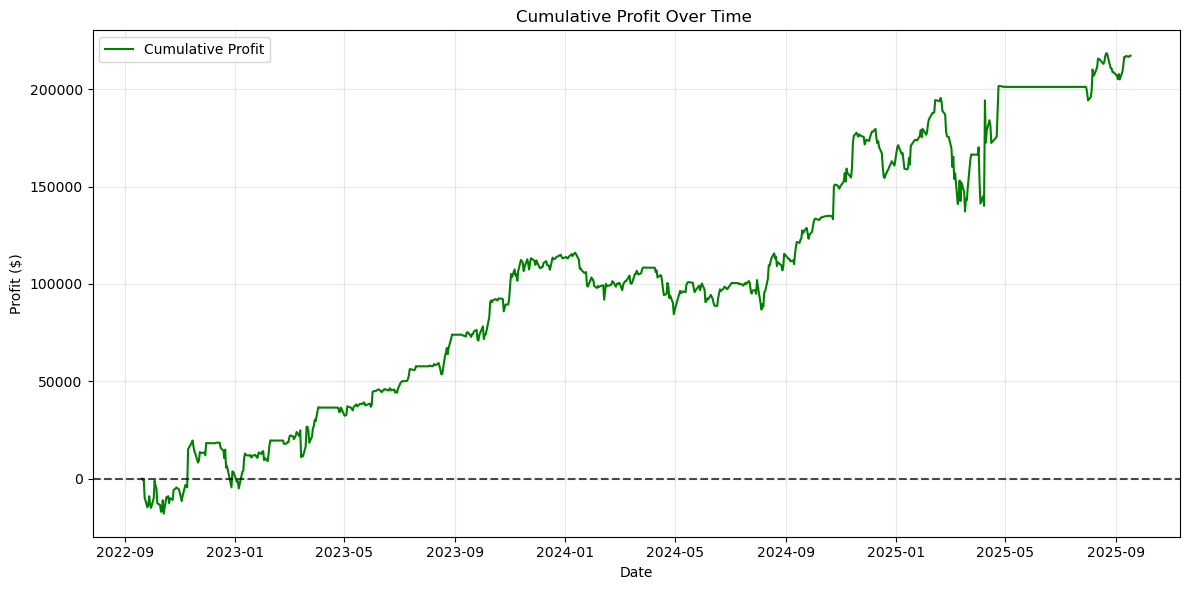

In [59]:
import datetime

# Define the starting date for the last 3 years
end_date = pv_series.index[-1]
start_date = end_date - pd.DateOffset(years=3)

# Compute an equal-weight buy-and-hold portfolio (bnh_value) so it's defined before use
# Allocate initial_cash equally across available tickers, buy integer shares at first available price
n = len(available_tickers)
if n > 0:
    alloc = initial_cash / n
    first_date = raw.index[0]
    shares = {}
    cash_leftover = 0.0
    for t in available_tickers:
        first_price = raw.loc[first_date, t]
        qty = math.floor(alloc / first_price)
        shares[t] = qty
        cash_leftover += (alloc - qty * first_price)
    # daily value = sum(shares * price) + leftover cash
    bnh_value = (raw[available_tickers] * pd.Series(shares)).sum(axis=1) + cash_leftover
else:
    # fallback: empty series (shouldn't happen if tickers are present)
    bnh_value = pd.Series(index=pv_series.index, dtype=float)

# Slice portfolio and buy-and-hold series
pv_slice = pv_series.loc[start_date:end_date]
bnh_slice = bnh_value.loc[start_date:end_date]

# Plot strategy equity vs buy-and-hold 
plt.figure(figsize=(12,6))
plt.plot(pv_slice.index, pv_slice.values, label='Strategy Equity')
plt.plot(bnh_slice.index, bnh_slice.values, label='Equal-weight Buy & Hold')
plt.title('Equity Curve vs Buy & Hold (Last 3 Years)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot signals & trades for one ticker 
sample_ticker = available_tickers[0]
if sample_ticker in data:
    df = data[sample_ticker].copy()
    df_slice = df.loc[start_date:end_date]  # last 3 years
    plt.figure(figsize=(12,5))
    plt.plot(df_slice.index, df_slice['Close'], label='Close')
    plt.plot(df_slice.index, df_slice['SMA20'], label='SMA20', linestyle='--')
    plt.plot(df_slice.index, df_slice['BB_up'], label='BB_up', alpha=0.6)
    plt.plot(df_slice.index, df_slice['BB_low'], label='BB_low', alpha=0.6)
    
    buy_dates = df_slice.index[df_slice['buy_signal'] == 1]
    exit_dates = df_slice.index[df_slice['exit_signal'] == 1]
    
    plt.scatter(buy_dates, df_slice.loc[buy_dates, 'Close'], marker='^', s=80, label='Buy', zorder=5)
    plt.scatter(exit_dates, df_slice.loc[exit_dates, 'Close'], marker='v', s=60, label='Exit', zorder=5)
    
    plt.title(f'{sample_ticker} — Price with indicators & sample signals (Last 3 Years)')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
    plt.show()


# Plot cumulative profit
plt.figure(figsize=(12,6))
plt.plot(profit_slice.index, profit_slice.values, label='Cumulative Profit', color='green')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title('Cumulative Profit Over Time ')
plt.xlabel('Date')
plt.ylabel('Profit ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()